# Redes Neuronales Artificiales (RNA)

## Imports

In [1]:
# importamos las librerias y bibliotecas que utilizaremos para redes neuronales artificiales (RNA)
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from pandas import DataFrame
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score

## Funciones auxiliares

In [2]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

## Lectura del conjunto de datos

In [3]:
df = pd.read_csv('dataset-equilibrado-3.csv')

##  Visualización preliminar de la información

In [4]:
# Vista de los datos cargados
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1
1,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
2,72898,Female,67.0,1,1,Yes,Private,Rural,199.24,33.9,never smoked,1
3,72882,Male,47.0,0,0,Yes,Private,Rural,75.30,25.0,formerly smoked,0
4,72861,Female,52.0,0,0,Yes,Private,Urban,69.30,20.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2378,132,Female,80.0,0,0,Yes,Govt_job,Urban,84.86,NaN,Unknown,0
2379,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
2380,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
2381,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0


In [5]:
#Validamos la cantidad de ejemplos que posee el dataset
df["stroke"].value_counts()

0    1600
1     783
Name: stroke, dtype: int64

## Primera preparación del conjunto de datos

In [6]:
df_new = pd.get_dummies(df, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [7]:
df_new

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,72918,53.0,1,0,62.55,30.3,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
1,72911,57.0,1,0,129.54,60.9,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,72898,67.0,1,1,199.24,33.9,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,72882,47.0,0,0,75.30,25.0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,72861,52.0,0,0,69.30,20.1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,132,80.0,0,0,84.86,NaN,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2379,129,24.0,0,0,97.55,26.2,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2380,99,31.0,0,0,108.89,52.3,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
2381,84,55.0,0,0,89.17,31.5,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


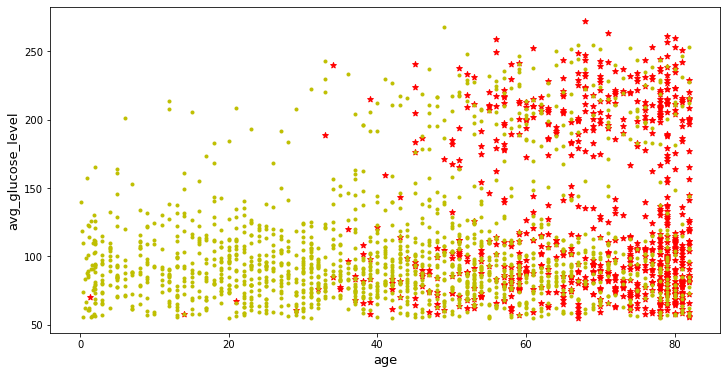

In [8]:
# Representación gráfica de dos características
plt.figure(figsize=(12, 6))
plt.scatter(df_new["age"][df_new['stroke'] == 1], df_new["avg_glucose_level"][df_new['stroke'] == 1], c="r", marker="*")
plt.scatter(df_new["age"][df_new['stroke'] == 0], df_new["avg_glucose_level"][df_new['stroke'] == 0], c="y", marker=".")
plt.xlabel("age", fontsize=13)
plt.ylabel("avg_glucose_level", fontsize=13)
plt.show()

In [9]:
#Eliminamos datos que son irrelevantes y que podrian alterar el comportamiento del algoritmo
df_new = df_new.drop(["id"], axis=1)

## División del conjunto de datos

In [10]:
# Division del conjunto en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(df_new, stratify='stroke')

In [11]:
#Verificamos las particiones realizadas
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 1429
Longitud del Validation Set: 477
Longitud del Test Set: 477


In [12]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("stroke", axis=1)
y_train = train_set["stroke"].copy()

In [13]:
# Conjunto de datos de validación
X_val = val_set.drop("stroke", axis=1)
y_val = val_set["stroke"].copy()

In [14]:
# Conjunto de datos de pruebas
X_test = test_set.drop("stroke", axis=1)
y_test = test_set["stroke"].copy()

## Segunda preparación del conjunto de datos

In [15]:
# Construcción de un pipeline para rellenar los valores nulos con la mediana y scalar los datos 
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [16]:
# Rellenamos los valores nulos con la mediana y scalamos los datos
X_train_prep = num_pipeline.fit_transform(X_train)
X_val_prep = num_pipeline.fit_transform(X_val)
X_test_prep = num_pipeline.fit_transform(X_test)

In [17]:
# Transformamos el resultado a un DataFrame de Pandas
X_train_prep = pd.DataFrame(X_train_prep, columns=X_train.columns, index=y_train.index)
X_val_prep = pd.DataFrame(X_val_prep, columns=X_val.columns, index=y_val.index)
X_test_prep = pd.DataFrame(X_test_prep, columns=X_test.columns, index=y_test.index)

In [18]:
#Validamos que los cambios se aplicaron correctamente 
X_train_prep

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2082,-0.315789,0.0,0.0,-0.197073,-0.141026,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2367,-0.315789,0.0,0.0,2.230439,5.576923,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
118,0.289474,0.0,0.0,-0.727805,1.051282,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
959,0.184211,0.0,0.0,0.058341,-0.230769,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1592,-0.500000,0.0,0.0,0.232390,0.282051,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,-1.105263,0.0,0.0,-0.408780,-0.961538,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,0.0
342,0.631579,0.0,0.0,-0.284488,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39,-0.763158,0.0,0.0,0.821854,-0.141026,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1486,-0.605263,0.0,0.0,-0.144195,0.948718,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Redes Neuronales Artificiales con un conjunto de datos de dos dimensiones

In [19]:
X_train_reduced = X_train_prep[["age", "avg_glucose_level"]].copy()
X_val_reduced = X_val_prep[["age", "avg_glucose_level"]].copy()
X_test_reduced = X_test_prep[["age", "avg_glucose_level"]].copy()

In [20]:
X_train_reduced

,age,avg_glucose_level
2082,-0.315789,-0.197073
2367,-0.315789,2.230439
118,0.289474,-0.727805
959,0.184211,0.058341
1592,-0.500000,0.232390
...,...,...
2370,-1.105263,-0.408780
342,0.631579,-0.284488
39,-0.763158,0.821854
1486,-0.605263,-0.144195


**Entrenamiento del algoritmo con un conjunto de datos reducido**

In [21]:
# Definición de la arquitectura de la red neuronal
from keras import models
from keras import layers
from tensorflow.python import tf2
import keras_metrics as km

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_reduced.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=[km.f1_score()])

In [22]:
# Resumen de las capas del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Entrenamos el modelo
history = model.fit(X_train_reduced,
                   y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(X_val_reduced, y_val))

Epoch 1/40


C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1348: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


3/3 [==============================] - 1s 99ms/step - loss: 0.6856 - f1_score: 0.2987 - val_loss: 0.6648 - val_f1_score: 0.3771
Epoch 2/40
3/3 [==============================] - 0s 10ms/step - loss: 0.6575 - f1_score: 0.4476 - val_loss: 0.6403 - val_f1_score: 0.4876
Epoch 3/40
3/3 [==============================] - 0s 10ms/step - loss: 0.6332 - f1_score: 0.5126 - val_loss: 0.6137 - val_f1_score: 0.5293
Epoch 4/40
3/3 [==============================] - 0s 10ms/step - loss: 0.6083 - f1_score: 0.5429 - val_loss: 0.5891 - val_f1_score: 0.5533
Epoch 5/40
3/3 [==============================] - 0s 11ms/step - loss: 0.5867 - f1_score: 0.5604 - val_loss: 0.5689 - val_f1_score: 0.5658


C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1348: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


Epoch 6/40
3/3 [==============================] - 0s 12ms/step - loss: 0.5676 - f1_score: 0.5712 - val_loss: 0.5510 - val_f1_score: 0.5767
Epoch 7/40
3/3 [==============================] - 0s 10ms/step - loss: 0.5505 - f1_score: 0.5796 - val_loss: 0.5339 - val_f1_score: 0.5840
Epoch 8/40
3/3 [==============================] - 0s 11ms/step - loss: 0.5351 - f1_score: 0.5876 - val_loss: 0.5190 - val_f1_score: 0.5907
Epoch 9/40
3/3 [==============================] - 0s 11ms/step - loss: 0.5208 - f1_score: 0.5933 - val_loss: 0.5059 - val_f1_score: 0.5960
Epoch 10/40
3/3 [==============================] - 0s 11ms/step - loss: 0.5095 - f1_score: 0.5974 - val_loss: 0.4943 - val_f1_score: 0.5995
Epoch 11/40
3/3 [==============================] - 0s 11ms/step - loss: 0.4975 - f1_score: 0.6015 - val_loss: 0.4838 - val_f1_score: 0.6033
Epoch 12/40
3/3 [==============================] - 0s 11ms/step - loss: 0.4884 - f1_score: 0.6054 - val_loss: 0.4749 - val_f1_score: 0.6068
Epoch 13/40
3/3 [=======

**Representación del límite de decisión**

In [24]:
def plot_ann_decision_boundary(X, y, model, steps=1000):
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = labels.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)

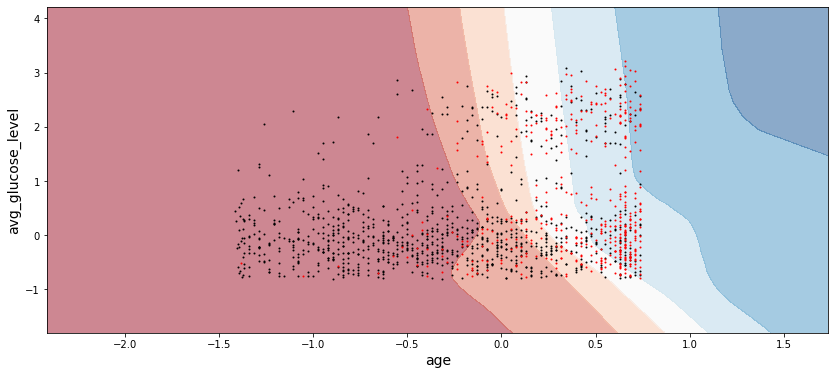

In [25]:
plt.figure(figsize=(14, 6))
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

**Representación de los ejemplos catalogados como maliciosos**

In [26]:
# Predicción con el conjunto de datos de entrenamiento
#y_pred = model.predict_classes(X_train_reduced)(metodo descontinuado)
y_pred = (model.predict(X_train_reduced) > 0.5).astype("int32")

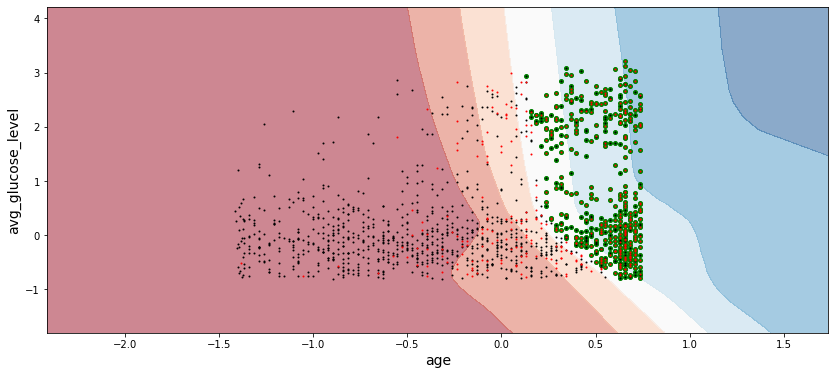

In [27]:
plt.figure(figsize=(14, 6))
plt.plot(X_train_reduced[y_pred==1]["age"], X_train_reduced[y_pred==1]["avg_glucose_level"], 'go', markersize=4)
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

**Predicción con el conjunto de datos reducido**

In [28]:
# Predicción con el conjunto de datos de prueba
#y_pred = model.predict_classes(X_test_reduced)(metodo descontinuado)
y_pred = (model.predict(X_test_reduced) > 0.5).astype("int32")

In [29]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.746


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[259,  62],
       [ 59,  97]], dtype=int64)

In [31]:
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_val, y_pred, pos_label=0))

F1 score: 0.6802507836990596


## Redes Neuronales Artificiales con un conjunto de datos multidimensional

### Aplicamos selección de características con Random Forest

In [32]:
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_prep, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [33]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X_train_prep), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(5)

age                       0.330391
avg_glucose_level         0.184801
bmi                       0.162074
heart_disease             0.036983
smoking_status_Unknown    0.033719
dtype: float64

In [34]:
# Reducimos el conjunto de datos a las 10 características más importantes
features = list(feature_importances_sorted.head(20).index)
X_train_select = X_train_prep[features].copy()
X_val_select = X_val_prep[features].copy()
X_test_select = X_test_prep[features].copy()
X_train_select

,age,avg_glucose_level,bmi,heart_disease,smoking_status_Unknown,hypertension,ever_married_No,work_type_Self-employed,ever_married_Yes,smoking_status_never smoked,smoking_status_formerly smoked,Residence_type_Urban,Residence_type_Rural,smoking_status_smokes,gender_Female,work_type_Private,gender_Male,work_type_Govt_job,work_type_children,work_type_Never_worked
2082,-0.315789,-0.197073,-0.141026,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0
2367,-0.315789,2.230439,5.576923,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0
118,0.289474,-0.727805,1.051282,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0
959,0.184211,0.058341,-0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0
1592,-0.500000,0.232390,0.282051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,-1.105263,-0.408780,-0.961538,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0
342,0.631579,-0.284488,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,-0.763158,0.821854,-0.141026,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0
1486,-0.605263,-0.144195,0.948718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0


### Entrenamiento del algoritmo RNA

In [35]:
# Entrenamiento del algoritmo
model = models.Sequential()

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_select.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=[km.f1_score()])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Entrenamos el algoritmo
history = model.fit(X_train_select,
                   y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(X_val_select, y_val))

Epoch 1/40


C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1348: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


3/3 [==============================] - 1s 93ms/step - loss: 0.6850 - f1_score: 0.4310 - val_loss: 0.6631 - val_f1_score: 0.4035
Epoch 2/40
3/3 [==============================] - 0s 10ms/step - loss: 0.6448 - f1_score: 0.3826 - val_loss: 0.6374 - val_f1_score: 0.3664
Epoch 3/40
3/3 [==============================] - 0s 12ms/step - loss: 0.6185 - f1_score: 0.3522 - val_loss: 0.6166 - val_f1_score: 0.3477
Epoch 4/40
3/3 [==============================] - 0s 11ms/step - loss: 0.5967 - f1_score: 0.3397 - val_loss: 0.5980 - val_f1_score: 0.3435
Epoch 5/40
3/3 [==============================] - 0s 10ms/step - loss: 0.5775 - f1_score: 0.3439 - val_loss: 0.5799 - val_f1_score: 0.3536


C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1348: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


Epoch 6/40
3/3 [==============================] - 0s 10ms/step - loss: 0.5586 - f1_score: 0.3582 - val_loss: 0.5632 - val_f1_score: 0.3681
Epoch 7/40
3/3 [==============================] - 0s 10ms/step - loss: 0.5416 - f1_score: 0.3743 - val_loss: 0.5471 - val_f1_score: 0.3859
Epoch 8/40
3/3 [==============================] - 0s 11ms/step - loss: 0.5268 - f1_score: 0.3921 - val_loss: 0.5328 - val_f1_score: 0.4031
Epoch 9/40
3/3 [==============================] - 0s 11ms/step - loss: 0.5134 - f1_score: 0.4110 - val_loss: 0.5198 - val_f1_score: 0.4219
Epoch 10/40
3/3 [==============================] - 0s 10ms/step - loss: 0.5026 - f1_score: 0.4304 - val_loss: 0.5082 - val_f1_score: 0.4392
Epoch 11/40
3/3 [==============================] - 0s 10ms/step - loss: 0.4928 - f1_score: 0.4477 - val_loss: 0.4983 - val_f1_score: 0.4556
Epoch 12/40
3/3 [==============================] - 0s 10ms/step - loss: 0.4844 - f1_score: 0.4615 - val_loss: 0.4896 - val_f1_score: 0.4683
Epoch 13/40
3/3 [=======

In [38]:
# Predicción con el conjunto de datos de validación
#y_pred = model.predict_classes(X_test_reduced)(metodo descontinuado)
y_pred = (model.predict(X_test_select) > 0.5).astype("int32")

In [39]:
print("F1 Score:", f1_score(y_pred, y_test, pos_label=1))

F1 Score: 0.6644067796610169


In [40]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.792


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[280,  41],
       [ 58,  98]], dtype=int64)

In [42]:
# Predicción con el conjunto de datos de prueba
#y_pred = model.predict_classes(X_test_reduced)(metodo descontinuado)
y_pred = (model.predict(X_val_select) > 0.5).astype("int32")

In [43]:
print("F1 Score:", f1_score(y_pred, y_val, pos_label=1))

F1 Score: 0.6360424028268551


In [44]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.784


In [45]:
confusion_matrix(y_val, y_pred)

array([[284,  36],
       [ 67,  90]], dtype=int64)